In [ ]:
import sounddevice as sd
import numpy as np
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import torchaudio
import torch

In [3]:
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-medium.en").to('cuda')
processor = WhisperProcessor.from_pretrained("openai/whisper-medium.en")

In [4]:
sd.default.samplerate = 16000
sd.default.device = 1

In [ ]:
def transcribe_audio(audio_array, model, processor):
    # transcrible audio using whisper model
    print("transcribe function called")
    
    inputs = processor(audio_array , sampling_rate = 16000 , return_tensors = 'pt')
    inputs = inputs.to('cuda')
    
    print("start to transcrpting")
    
    # generated new ids base on the inputs
    output_ids = model.generate(inputs)
    
    # Decode tokens
    output_text = processor.batch_decode(output_ids, skip_special_tokens = True)
    
    return output_text[0]
    
    
    

In [6]:
def audio_callback(indata, frames, time, status):
    if status:
        print(status)
    # Append the incoming audio data to the global list
    global audio_data
    audio_data.append(indata.copy())

In [7]:
def record_audio(duration = 5 , model = None, processor = None):
    # define global variable for all audio samples
    global audio_data
    audio_data = []
    
    # define sampling rate
    sampling_rate = 16000
    channels = 1 # mono channels
    
    # Start the stream
    with sd.InputStream(callback=audio_callback, samplerate=sampling_rate, channels=channels):
        sd.sleep(duration * 1000)  # Sleep for the duration of the recording

    audio_array = np.concatenate(audio_data)
    audio_array = audio_array.squeeze()
    transcription = transcribe_audio(audio_array, model, processor)
    
    sd.wait()
    #transcription = transcribe_audio(record, model, processor)
    return transcription

    #return audio_array
    

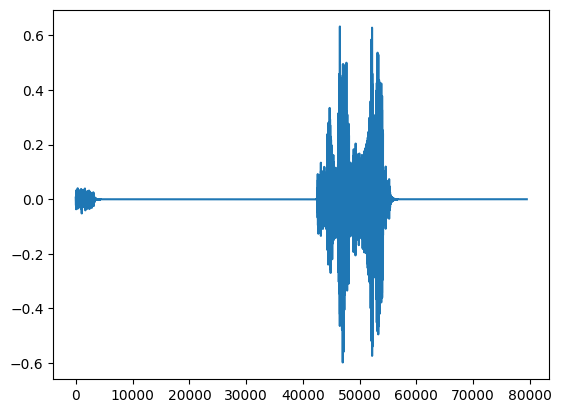

In [8]:
transcription = record_audio(5, model=model, processor=processor)

import matplotlib.pyplot as plt
plt.plot(transcription)
plt.show()




In [10]:
trans = transcribe_audio(transcription, model, processor)

transcruble function called


ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [8]:
while True:
    print("Starting a new 10-second recording...")
    transcription = record_audio(5, model=model, processor=processor)
    print("Recording completed. Transcription:", transcription)
    print("Waiting for the next recording...")
    sd.sleep(10)  # Delay before the next recording

Starting a new 10-second recording...
transcruble function called


KeyboardInterrupt: 